In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',None)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Loading the database

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

## Gathering some basic information about the database

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## PLotting the bar-graph for majority and minority classes along with their frequency

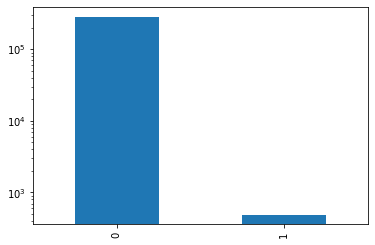

In [ ]:
df.Class.value_counts().plot.bar(logy=True)

## Exploratory Data Analysis

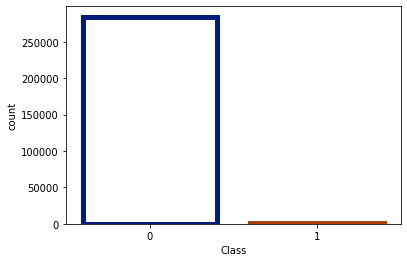

In [ ]:
sns.countplot(df['Class'],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), label = "Count")

### To see the actual distribution of data 

## Pair-plotting some columns
### (The hue of the points represents the target class)

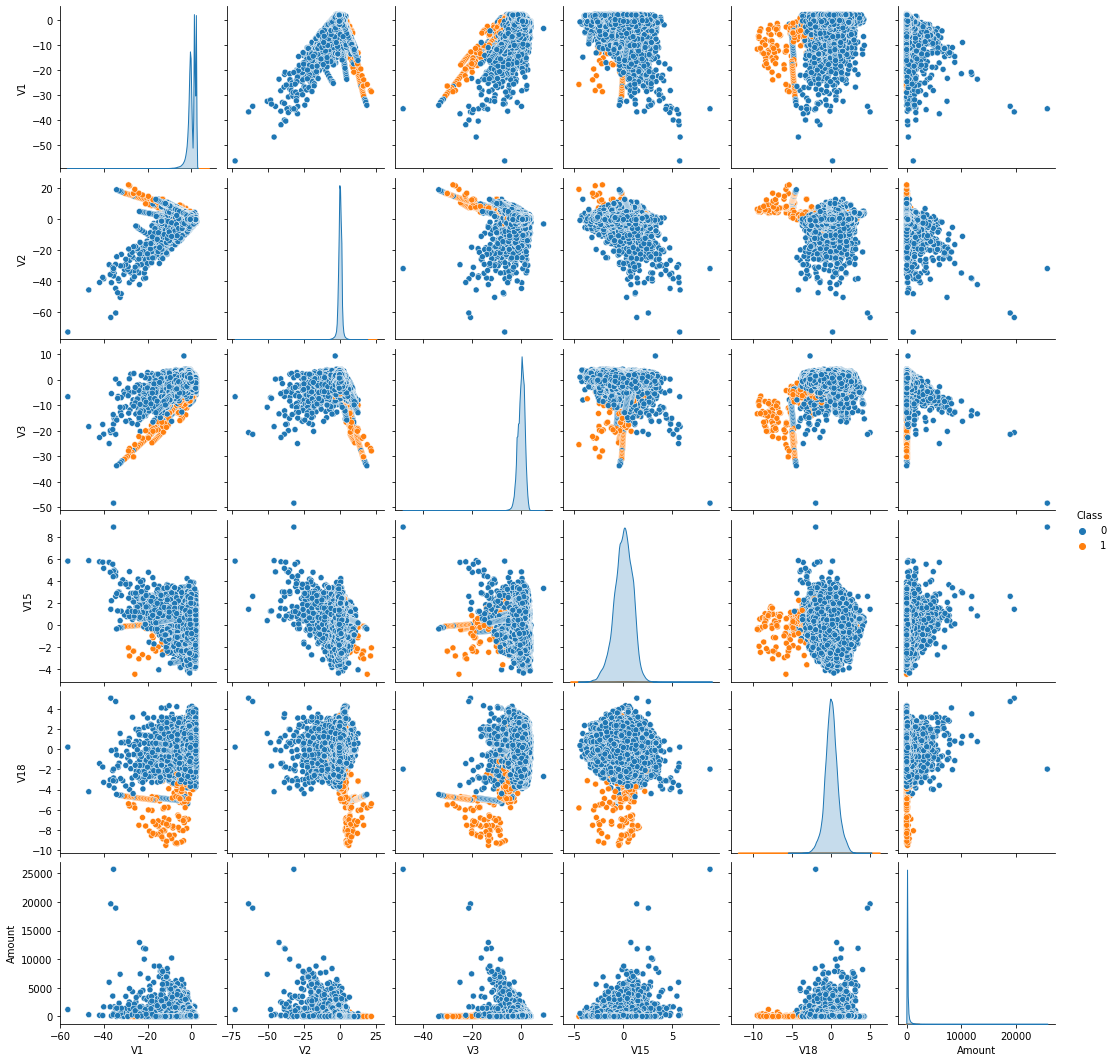

In [ ]:
sns.pairplot(df, hue = 'Class', vars = ['V1', 'V2', 'V3', 'V15', 'V18','Amount'] )

## Plotting amount vs V1 and analysing the population of each class.

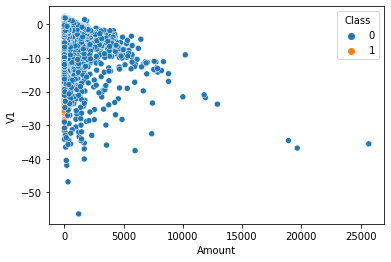

In [ ]:
sns.scatterplot(x = 'Amount', y = 'V1',hue='Class',  data = df)

# Correlation Plot with Class 

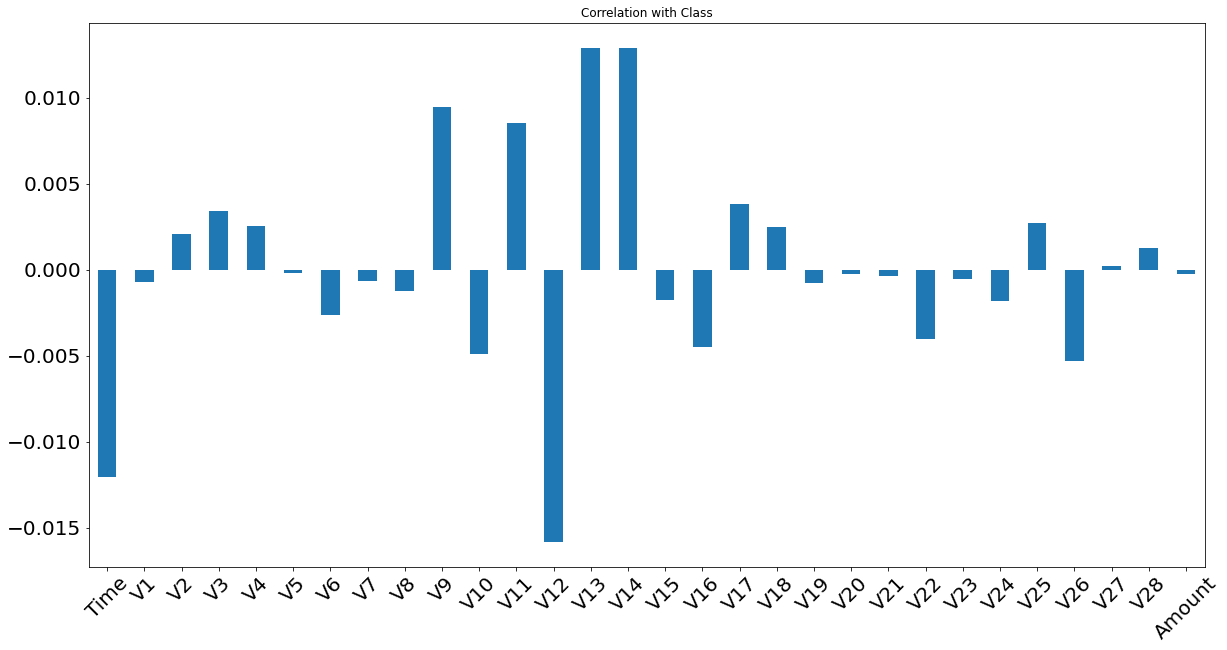

In [ ]:
x.corrwith(df.Class).plot.bar(figsize = (20, 10), title = "Correlation with Class", fontsize = 20,rot = 45, grid = False)

## Pre-processing of the dataset

In [ ]:
# Check for row level duplicates 
print("original shape of dataframe :-",df.shape)
print("shape of dataframe after duplicate removal :-",df.drop_duplicates().shape)
# We have duplicates , so lets remove it 
df=df.drop_duplicates()

original shape of dataframe :- (284807, 31)
shape of dataframe after duplicate removal :- (283726, 31)


In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)


## Plotting the Heat-Map after pre-processing the data

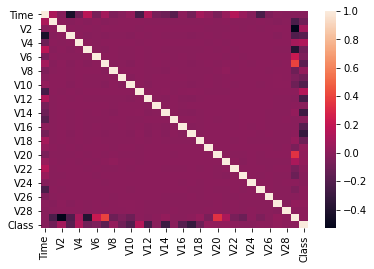

In [ ]:
sns.heatmap(df.corr())

In [ ]:
def model_fit(model,x_train,y_train,x_test,y_test,model_name): 
    model_cur=model.fit(x_train,y_train)
    predictions=model_cur.predict(x_test)
    model_evaluation(y_test,predictions,model_name)
def model_evaluation(y_test,predictions,model_name): 
    print('Report for '+model_name+ ' is \n'+str(classification_report(y_test,predictions)))
    print('ROC_AUC for'+model_name+ ' is \n'+str(roc_auc_score(y_test,predictions)))


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
models={'Logisitc regression': LogisticRegression(),
       'Decision tree classifier' : DecisionTreeClassifier(), 
       'Random forest Classifier': RandomForestClassifier() }


## Testing the F1 Score of different models before applying SMOTe on the dataset.

In [ ]:

for model_name,model in models.items(): 
    model_fit(model,x_train,y_train,x_test,y_test,model_name)


Report for Logisitc regression is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.55      0.68       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118

ROC_AUC forLogisitc regression is 
0.7760546849204978
Report for Decision tree classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.71      0.75      0.73       134

    accuracy                           1.00     85118
   macro avg       0.85      0.88      0.86     85118
weighted avg       1.00      1.00      1.00     85118

ROC_AUC forDecision tree classifier is 
0.8766185663043158
Report for Random forest Classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
         

# Data Level Approaches

## Implementing SMOTe from scratch.

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors


def nearest_neighbour(X):
  nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
  euclidean,indices= nbs.kneighbors(X)
  return indices

def SMOTE_100(X):
  indices2 = nearest_neighbour(X)
  
  matrix=[]
  for m in range(len(indices2)):
    
    t=x1[indices2[m]]
    newt=pd.DataFrame(t)
    matrix.append([])
    
    for j in range(len(newt.columns)):
      matrix[m].append(random.choice(newt[j]))
  return np.asarray(matrix)




# Getting the number of Minority Class Instances in Training Set

In [ ]:

unique, counts = np.unique(y_train, return_counts=True)
print(unique,counts)

minority_shape = dict(zip(unique, counts))[1]



[0 1] [198269    339]


# Storing the minority class instances separately

In [ ]:

x1 = np.ones((minority_shape, x_train.shape[1]))

x1=[x_train.iloc[i] for i, v in enumerate(y_train) if v==1.0]

x1=np.array(x1)



# Applying 100% SMOTe

### Generating Training samples

In [ ]:

sampled_instances = SMOTE_100(x1)
print(len(x1))
print(len(x_train.iloc[0]))
print((sampled_instances.shape))

X_TrainSMOTE=x_train
print(len(X_TrainSMOTE))
print(len(y_train))
print("x_train",len(x_train))


for i in range(len(sampled_instances)):
  X_TrainSMOTE = np.concatenate((x_train,sampled_instances), axis = 0)

y_sampled_instances = np.ones(minority_shape)

y_TrainSMOTE = np.concatenate((y_train,y_sampled_instances), axis=0)

339
30
(339, 30)
198608
198608
x_train 198608


In [ ]:
print(len(X_TrainSMOTE))
print((len(y_TrainSMOTE)))

198947
198947


# Testing different models after applying 100% SMOTe

In [ ]:
for model_name,model in models.items(): 
    model_fit(model,X_TrainSMOTE,y_TrainSMOTE,x_test,y_test,model_name)

Report for Logisitc regression is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.82      0.67      0.74       134

    accuracy                           1.00     85118
   macro avg       0.91      0.84      0.87     85118
weighted avg       1.00      1.00      1.00     85118

ROC_AUC forLogisitc regression is 
0.8357032263140665
Report for Decision tree classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.64      0.75      0.69       134

    accuracy                           1.00     85118
   macro avg       0.82      0.88      0.84     85118
weighted avg       1.00      1.00      1.00     85118

ROC_AUC forDecision tree classifier is 
0.8765244309376585
Report for Random forest Classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
         

## Comparing the results of F1-Score and Recall of minority class for different models on same data, after applying SMOTe and before applying SMOTe, we observe that always the accuracy is increasing with really noticable changes in some of the classifiers.

## Random Undersampling

In [ ]:
x_under = x_train.copy()
x_under['Class'] = y_train
x_maj_under = x_under[x_under.Class==0]
x_min_under = x_under[x_under.Class==1]
x_maj_under_rus = resample(x_maj_under,replace=False,n_samples=len(x_min_under),random_state=42)
x_under_rus = pd.concat([x_maj_under_rus, x_min_under])
x_train_under_rus = x_under_rus.drop(['Class'], axis=1)
y_train_under_rus = x_under_rus.Class

In [ ]:
for model_name,model in models.items(): 
    model_fit(model,x_train_under_rus,y_train_under_rus,x_test,y_test,model_name)

Report for Logisitc regression is 
              precision    recall  f1-score   support

           0       1.00      0.61      0.75     84984
           1       0.00      0.89      0.01       134

    accuracy                           0.61     85118
   macro avg       0.50      0.75      0.38     85118
weighted avg       1.00      0.61      0.75     85118

ROC_AUC forLogisitc regression is 
0.7467103553118339
Report for Decision tree classifier is 
              precision    recall  f1-score   support

           0       1.00      0.51      0.67     84984
           1       0.00      0.72      0.00       134

    accuracy                           0.51     85118
   macro avg       0.50      0.62      0.34     85118
weighted avg       1.00      0.51      0.67     85118

ROC_AUC forDecision tree classifier is 
0.6154291905341971
Report for Random forest Classifier is 
              precision    recall  f1-score   support

           0       1.00      0.61      0.75     84984
         

# Cost Sensitive Learning

In [ ]:
df=df.drop_duplicates()

In [ ]:
features = pd.concat([df.loc[:,'V1':'Amount'],df.loc[:,'Time']],axis=1)
target = df['Class']

x_train,x_test,y_train,y_test = train_test_split(features,target, stratify=target,test_size=0.35, random_state=1)

print('y_train class counts')
print(y_train.value_counts())
print('')
print('y_test class counts')
print(y_test.value_counts())

y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

y_train class counts
0    184114
1       307
Name: Class, dtype: int64

y_test class counts
0    99139
1      166
Name: Class, dtype: int64


In [ ]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

**Vanilla Logistic Regression**

In [ ]:
lr_model = LogisticRegression(class_weight='none')
lr_model.fit(x_train,y_train)
y_pred_vanilla= lr_model.predict(x_test)
vanilla=roc_curve(y_test,lr_model.predict_proba(x_test)[:,1])
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_vanilla)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_vanilla)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_vanilla)}')
print(f'Recall score: {recall_score(y_test,y_pred_vanilla)}')

Accuracy Score: 0.9992246110467751
Confusion Matrix: 
[[99128    11]
 [   66   100]]
Area Under Curve: 0.8011493416144326
Recall score: 0.6024096385542169


In [ ]:
lr_model.predict_proba(x_test).shape

(99305, 2)

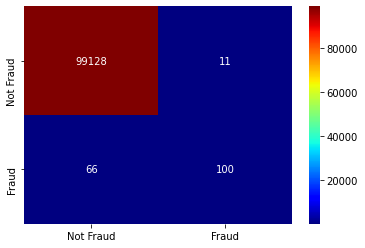

In [ ]:
import seaborn as sns
confm = confusion_matrix(y_test,y_pred_vanilla)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

**Weighted LR**

In [ ]:
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.9750465736871256
Confusion Matrix: 
[[96676  2463]
 [   15   151]]
Area Under Curve: 0.9423973240929706
Recall score: 0.9096385542168675
0.10863309352517986
0.05776587605202754
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     99139
           1       0.06      0.91      0.11       166

    accuracy                           0.98     99305
   macro avg       0.53      0.94      0.55     99305
weighted avg       1.00      0.98      0.99     99305



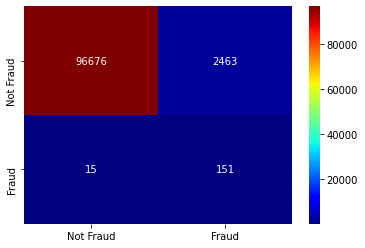

In [ ]:
confm = confusion_matrix(y_test,y_pred)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

Experimenting with different weights for the minority class

In [ ]:
rl=[]
f1=[]
acc=[]
roc=[]
ypred=[]
prob=[]
# pr=[]
for w in [1,5,10,50,100,150,200]:
    print('---Weight of {} for Fraud class---'.format(w))
    lr_model = LogisticRegression(random_state=69, class_weight={0:1,1:w})
    lr_model.fit(x_train,y_train)
    y_pred = lr_model.predict(x_test)
    prob.append(roc_curve(y_test,lr_model.predict_proba(x_test)[:,1]))
    ypred.append(y_pred)
    acc.append(accuracy_score(y_test,y_pred))
    rl.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    roc.append(roc_auc_score(y_test, y_pred))
    # pr.append(precision_score(y_test,y_pred))

    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test,y_pred)}')
    print(f'f1 score: {f1_score(y_test,y_pred)}')
    # print('precision',precision_score(y_test,y_pred))
    print(f'precision score: {precision_score(y_test,y_pred)}')
    print(classification_report(y_test,y_pred))
    print('\n\n')

---Weight of 1 for Fraud class---
Accuracy Score: 0.9992246110467751
Confusion Matrix: 
[[99128    11]
 [   66   100]]
Area Under Curve: 0.8011493416144326
Recall score: 0.6024096385542169
f1 score: 0.7220216606498195



---Weight of 5 for Fraud class---
Accuracy Score: 0.9993051709380192
Confusion Matrix: 
[[99110    29]
 [   40   126]]
Area Under Curve: 0.8793718129966481
Recall score: 0.7590361445783133
f1 score: 0.7850467289719626



---Weight of 10 for Fraud class---
Accuracy Score: 0.9992246110467751
Confusion Matrix: 
[[99100    39]
 [   38   128]]
Area Under Curve: 0.8853454751433942
Recall score: 0.7710843373493976
f1 score: 0.7687687687687688



---Weight of 50 for Fraud class---
Accuracy Score: 0.998328382256684
Confusion Matrix: 
[[99000   139]
 [   27   139]]
Area Under Curve: 0.917973662875916
Recall score: 0.8373493975903614
f1 score: 0.6261261261261262



---Weight of 100 for Fraud class---
Accuracy Score: 0.9959317254921706
Confusion Matrix: 
[[98761   378]
 [   26   1

In [ ]:
from matplotlib import pyplot as plt
plt.plot(vanilla[0],vanilla[1],label='vanilla')
# for i in prob:
plt.plot(prob[1][0],prob[1][1])
plt.title('ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# x=[1,5,10,50,100,150,200]
# plt.xticks(range(len(x)),x)
# plt.legend(['Accuracy','Recall score','ROC AUC','f1 score'], loc='best')
plt.show()

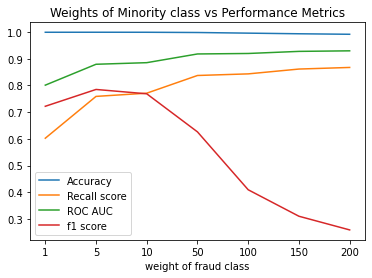

In [ ]:
from matplotlib import pyplot as plt

plt.plot(acc)
plt.plot(rl)
plt.plot(roc)
plt.plot(f1)
plt.title('Weights of Minority class vs Performance Metrics')
plt.ylabel('')
plt.xlabel('weight of fraud class')
x=[1,5,10,50,100,150,200]
plt.xticks(range(len(x)),x)
plt.legend(['Accuracy','Recall score','ROC AUC','f1 score'], loc='best')
plt.show()

**Hyperparameter Optimisation**

In [ ]:
# define hyperparameters
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0},
{0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0},
{0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0},
{0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100},
{0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0},
{0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1},
{0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005},
{0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150},
{0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500},
{0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
,"penalty": ["l1", "l2"]
,"C": crange
,"fit_intercept": [True, False] }

In [ ]:
# logistic model classifier
from sklearn.model_selection import GridSearchCV
lg4 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=100,n_jobs=-1, refit=True)
grid.fit(x_train,y_train)
print(f'Best score: {grid.best_score_} with param:{grid.best_params_}')

In [ ]:
grid

GridSearchCV(cv=100, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=13, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3....
                                          {0: 0.005, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 1.0, 1: 0.1}, {0: 10, 1: 0.1},
                                          {0: 100, 1: 0.1}, {0: 10, 1: 0.01},
                                          {0:

**Vanilla Neural Network**

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

def define_model(n_input):
	model = Sequential()
	model.add(Dense(128, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# model.add(Dense(64, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

n_input = x_train.shape[1]
model = define_model(n_input)
history = model.fit(x_train,y_train, epochs=10, verbose=0)
yhat = model.predict(x_test)
y_pred=model.evaluate(x_test,y_test)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)

3104/3104 [==============================] - 3s 1ms/step - loss: 0.0036 - accuracy: 0.9994
ROC AUC: 0.953


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
p=model.predict_proba(x_test)
vanilla=roc_curve(y_test,p)

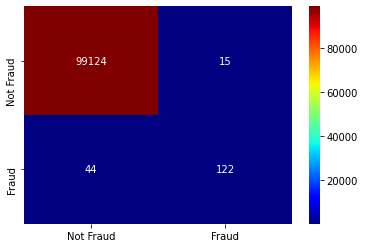

In [ ]:
ypred=(yhat>=0.5)
ypred=np.array([1 if i else 0 for i in ypred])
confm = confusion_matrix(y_test,ypred)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

**Cost sensitive neural network**

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

def define_model(n_input):
	model = Sequential()
	model.add(Dense(128, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# model.add(Dense(64, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model
weights = {0:1, 1:100}
n_input = x_train.shape[1]
model = define_model(n_input)
history = model.fit(x_train,y_train, epochs=10, verbose=0, class_weight=weights)
yhat = model.predict(x_test)
y_pred=model.evaluate(x_test,y_test)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)

3104/3104 [==============================] - 3s 1ms/step - loss: 0.0330 - accuracy: 0.9908
ROC AUC: 0.967


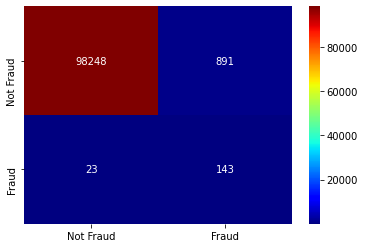

In [ ]:
ypred=(yhat>=0.5)
ypred=np.array([1 if i else 0 for i in ypred])
confm = confusion_matrix(y_test,ypred)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

In [ ]:
p2=model.predict_proba(x_test)
weighted=roc_curve(y_test,p2)

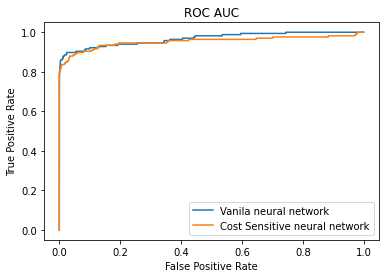

In [ ]:
from matplotlib import pyplot as plt
plt.plot(weighted[0],weighted[1],label='weighted')
plt.plot(vanilla[0],vanilla[1],label='vanilla')
plt.title('ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Vanila neural network','Cost Sensitive neural network'], loc='best')
plt.show()

# Ensemble Methods

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Vanilla AdaBoosting (Ensembling without any type of sampling)

In [ ]:
def adaboost(X_train, X_test, y_train):
    model = AdaBoostClassifier(n_estimators=500, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    return y_pred
# AdaBoost
y_baseline = adaboost(x_train, x_test, y_train)



# Analysis of AdaBoost

In [ ]:
f1_score(y_test,y_baseline)

0.8326530612244898

In [ ]:
    target_names = ['Not Fraud', 'Fraud']
    print(classification_report(y_test, y_baseline ,
                                target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     84984
       Fraud       0.92      0.76      0.83       134

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



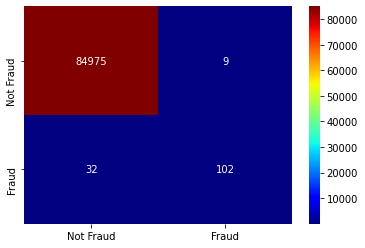

In [ ]:
confm = confusion_matrix(y_test,y_baseline)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

# SMOTe + AdaBoost

In [ ]:
# SMOTE
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
y_smote = adaboost(x_train_sm, x_test, y_train_sm)

# Analysis of SMOTe + AdaBoost

In [ ]:
f1_score(y_test,y_smote)

0.28571428571428575

In [ ]:
    target_names = ['Not Fraud', 'Fraud']
    print(classification_report(y_test, y_smote, 
                                target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     84984
       Fraud       0.17      0.85      0.29       134

    accuracy                           0.99     85118
   macro avg       0.59      0.92      0.64     85118
weighted avg       1.00      0.99      1.00     85118



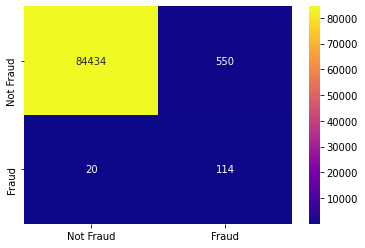

In [ ]:
confm = confusion_matrix(y_test,y_smote)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='plasma',annot=True,fmt='g')

# RUS + AdaBoost

In [ ]:
# RUS
x_full = x_train.copy()
x_full['Class'] = y_train
x_maj = x_full[x_full.Class==0]
x_min = x_full[x_full.Class==1]
x_maj_rus = resample(x_maj,replace=False,n_samples=len(x_min),random_state=22)
x_rus = pd.concat([x_maj_rus, x_min])
x_train_rus = x_rus.drop(['Class'], axis=1)
y_train_rus = x_rus.Class
y_rus = adaboost(x_train_rus, x_test, y_train_rus)

# Analysis of RUS + AdaBoost

In [ ]:
f1_score(y_test,y_rus)

0.006006507049303412

In [ ]:
target_names = ['Not Fraud', 'Fraud']
print(classification_report(y_test, y_rus, 
                                target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.58      0.73     84984
       Fraud       0.00      0.81      0.01       134

    accuracy                           0.58     85118
   macro avg       0.50      0.69      0.37     85118
weighted avg       1.00      0.58      0.73     85118



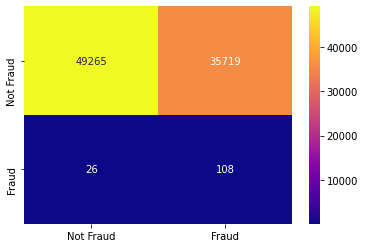

In [ ]:
confm = confusion_matrix(y_test,y_rus)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='plasma',annot=True,fmt='g')

# RUSBoost

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

In [ ]:
rusboost = RUSBoostClassifier(n_estimators=100, algorithm='SAMME.R',random_state=42)

In [ ]:
rusboost.fit(x_train, y_train)
y_rusboost = rusboost.predict(x_test)
print()
print(str(rusboost))
print()
print(classification_report(y_test, y_rusboost, 
                            target_names=target_names))


RUSBoostClassifier(n_estimators=100, random_state=42)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     84984
       Fraud       0.04      0.81      0.08       134

    accuracy                           0.97     85118
   macro avg       0.52      0.89      0.54     85118
weighted avg       1.00      0.97      0.98     85118



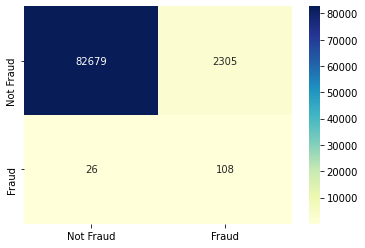

In [ ]:
confm = confusion_matrix(y_test,y_rusboost)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='YlGnBu',annot=True,fmt='g')

# SMOTeBoost

In [ ]:
def smoteboost(X_train, X_test, y_train):
    sm = SMOTE(random_state=42)
    model = AdaBoostClassifier(n_estimators=1, random_state=42)
    x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    for i in range(10):
    
      x_train_sm, y_train_sm = sm.fit_resample(x_train_sm, y_train_sm)
      
      model.fit(x_train_sm,y_train_sm)
    y_pred = model.predict(X_test) 
    return y_pred

y_sboost = smoteboost(x_train, x_test, y_train)

In [ ]:
print(classification_report(y_test, y_sboost, 
                                target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     84984
       Fraud       0.08      0.82      0.14       134

    accuracy                           0.98     85118
   macro avg       0.54      0.90      0.57     85118
weighted avg       1.00      0.98      0.99     85118



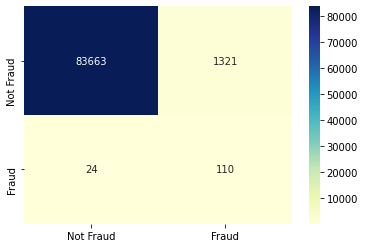

In [ ]:
confm = confusion_matrix(y_test,y_sboost)
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='YlGnBu',annot=True,fmt='g')

# Hybrid Approach

# Implementing a Cost Sensitive Neural Network with 5 layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense


In [ ]:
model = Sequential([
     Dense(units=16, input_dim=30, activation='relu'),
     Dense(units=24,activation='relu'),
     Dropout(0.5),
     Dense(20,activation='relu'),
     Dense(24,activation='relu'),
     Dense(1,activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
______________________________________________________

# Training and testing the model on actual data.

In [ ]:
weights={0:1,1:50}

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, batch_size=15, epochs=5,class_weight=weights)

Epoch 1/5
13241/13241 [==============================] - 21s 2ms/step - loss: 0.2917 - accuracy: 0.9967
Epoch 2/5
13241/13241 [==============================] - 20s 2ms/step - loss: 0.0937 - accuracy: 0.9981
Epoch 3/5
13241/13241 [==============================] - 20s 2ms/step - loss: 0.0769 - accuracy: 0.9979
Epoch 4/5
13241/13241 [==============================] - 20s 1ms/step - loss: 0.0664 - accuracy: 0.9979
Epoch 5/5
13241/13241 [==============================] - 20s 1ms/step - loss: 0.0649 - accuracy: 0.9973


# Analysis of the model trained on actual data.

In [ ]:
score=model.evaluate(x_test,y_test)
print(score)

2660/2660 [==============================] - 3s 969us/step - loss: 0.0154 - accuracy: 0.9965
[0.015415482223033905, 0.9964872002601624]


In [ ]:
target_names = ['Not Fraud', 'Fraud']
y_pred_actual=model.predict(x_test)
y_test_actual=pd.DataFrame(y_test)
print(classification_report(y_test_actual,y_pred_actual.round(),target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     84984
       Fraud       0.29      0.83      0.43       134

    accuracy                           1.00     85118
   macro avg       0.64      0.91      0.71     85118
weighted avg       1.00      1.00      1.00     85118



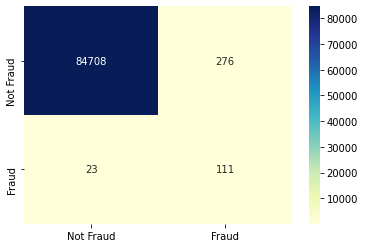

In [ ]:
confm=confusion_matrix(y_test_actual,y_pred_actual.round())
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='YlGnBu',annot=True,fmt='g')

# Training the model on oversampled data.

In [ ]:
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train_sm,y_train_sm, batch_size=15, epochs=5)

Epoch 1/5
26436/26436 [==============================] - 42s 2ms/step - loss: 0.0041 - accuracy: 0.9992
Epoch 2/5
26436/26436 [==============================] - 43s 2ms/step - loss: 0.0043 - accuracy: 0.9992
Epoch 3/5
26436/26436 [==============================] - 42s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/5
26436/26436 [==============================] - 40s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 5/5
26436/26436 [==============================] - 39s 1ms/step - loss: 0.0035 - accuracy: 0.9993


In [ ]:
y_pred_hybrid=model.predict(x_test)
y_test_hybrid=pd.DataFrame(y_test)
print(classification_report(y_test_hybrid,y_pred_hybrid.round(),target_names=target_names))

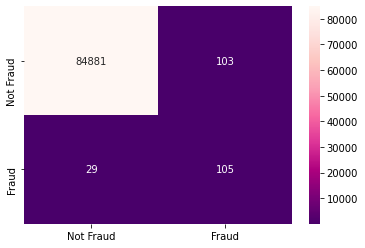

In [ ]:
confm=confusion_matrix(y_test_hybrid,y_pred_hybrid.round())
columns = ['Not Fraud','Fraud']

df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='RdPu_r',annot=True,fmt='g')

In [ ]:
roc = roc_auc_score(y_test, y_pred_hybrid.round())
fpr, tpr, _ = roc_curve(y_test, y_pred_hybrid.round())
roc_a = roc_auc_score(y_test, y_pred_actual.round())
fpra, tpra, _ = roc_curve(y_test, y_pred_actual.round())


In [ ]:
print("ActualApproach---->",roc_a)
print("Hybrid Approach--->",roc)

ActualApproach----> 0.8916145409636371
Hybrid Approach---> 0.9059692184376057


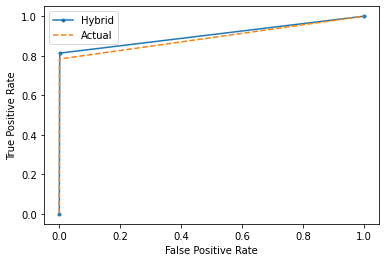

In [ ]:
pyplot.plot(fpr,tpr, marker='.', label='Hybrid')
pyplot.plot(fpra,tpra, linestyle='--', label='Actual')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

## Comparing both the results we observe here that with a neural network trained on oversampled data,although gives us a small drop in accuracy but it ultimately serves the purpose of increasing the recall of the minority class. 

# One-Class Learning

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold,cross_val_score
import tensorflow as tf
from keras import backend as K
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df=df.drop_duplicates()

In [ ]:
Y = np.array(df["Class"])
scaler=preprocessing.MinMaxScaler()
X = np.array(scaler.fit_transform(df.drop(["Class"],axis=1)))

X.shape,Y.shape

((283726, 30), (283726,))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((198608, 30), (85118, 30), (198608,), (85118,))

In [ ]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([283253,    473]))

#### Siamese Network:

In [ ]:
def get_label_index(Y):
  labels_index = []
  for i in range(2):
    idx = np.where(Y==i)[0]
    labels_index.append(idx)
  return labels_index


In [ ]:
labi = get_label_index(Y_train)

In [ ]:
len(labi)

2

In [ ]:
def get_pairs(X,Y,labels_index):
  X_new = []
  Y_new = []
  for i in range(len(X)):
    simidx = np.random.choice(labels_index[Y[i]])
    if(Y[i]==0):
      diffidx = 1
    else:
      diffidx = 0
    diffidx = np.random.choice(labels_index[diffidx])
    X_new.append([X[i],X[simidx]])
    Y_new.append(1)
    X_new.append([X[i],X[diffidx]])
    Y_new.append(0)
  
  return np.array(X_new).astype("float32"),np.array(Y_new).astype("float32")

In [ ]:
X_train_new,Y_train_new = get_pairs(X_train,Y_train,labi)

In [ ]:
X_train_new.shape

(396524, 2, 30)

In [ ]:
def get_euc_dist(X):
  # print(X.shape)
  A,B = X
  # print(A.shape,B.shape)
  tempsum = K.sum(K.square(A-B),axis = 1,keepdims=True)
  return K.sqrt(K.maximum(tempsum,K.epsilon()))

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    print(shape1)
    return (shape1[0], 1)

In [ ]:
def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [ ]:
def get_siamese_model():
  imginput = keras.layers.Input(shape = (30,))
  x = keras.layers.Dense(1024,input_shape = (30,), activation='relu')(imginput)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(512, activation='relu')(x)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(512, activation='relu')(x)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(512, activation='relu')(x)

  dense = keras.models.Model(imginput, x)

  input1 = keras.layers.Input((30,))
  input2 = keras.layers.Input((30,))

  dense1 = dense(input1)
  dense2 = dense(input2)

  merge_layer = keras.layers.Lambda(get_euc_dist,output_shape=eucl_dist_output_shape)([dense1, dense2])

  return keras.models.Model(inputs=[input1, input2], outputs=merge_layer)

In [ ]:
class ContrastiveLoss(keras.losses.Loss):
 
    def __init__(self, margin=1):
        super().__init__()
        self.margin = margin
 
    def call(self, y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(self.margin - y_pred, 0))
        loss = K.mean(y_true * square_pred + (1 - y_true) * margin_square)
        return loss

In [ ]:
model = get_siamese_model()
rms = keras.optimizers.RMSprop()
conloss = ContrastiveLoss(margin=1)
model.compile(optimizer = rms,loss=conloss,metrics=[accuracy])
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_36 (InputLayer)           [(None, 30)]         0                                            
__________________________________________________________________________________________________
model_22 (Functional)           (None, 512)          2131456     input_35[0][0]                   
                                                                 input_36[0][0]                   
__________________________________________________________________________________________________
lambda_11 (Lambda)              (None, 1)            0           model_22[0][0]            

In [ ]:
model.fit([X_train_new[:,0],X_train_new[:,1]],Y_train_new,batch_size = 512,epochs = 10,validation_split = 0.4,verbose = 1,shuffle=True)

Epoch 1/10
465/465 [==============================] - 9s 19ms/step - loss: 0.0406 - accuracy: 0.9500 - val_loss: 0.0445 - val_accuracy: 0.9429
Epoch 2/10
465/465 [==============================] - 9s 19ms/step - loss: 0.0389 - accuracy: 0.9517 - val_loss: 0.0319 - val_accuracy: 0.9606
Epoch 3/10
465/465 [==============================] - 9s 19ms/step - loss: 0.0370 - accuracy: 0.9542 - val_loss: 0.0308 - val_accuracy: 0.9589
Epoch 4/10
465/465 [==============================] - 9s 19ms/step - loss: 0.0356 - accuracy: 0.9555 - val_loss: 0.0390 - val_accuracy: 0.9480
Epoch 5/10
465/465 [==============================] - 9s 19ms/step - loss: 0.0339 - accuracy: 0.9577 - val_loss: 0.0281 - val_accuracy: 0.9650
Epoch 6/10
465/465 [==============================] - 9s 19ms/step - loss: 0.0318 - accuracy: 0.9602 - val_loss: 0.0219 - val_accuracy: 0.9761
Epoch 7/10
465/465 [==============================] - 9s 19ms/step - loss: 0.0308 - accuracy: 0.9617 - val_loss: 0.0200 - val_accuracy: 0.9752

In [ ]:
X_test_new,Y_test_new = get_pairs(X_test,Y_test,get_label_index(Y_test))

In [ ]:
Y_pred = model.predict([X_test_new[:,0],X_test_new[:,1]])
Y_pred = (Y_pred <= 0.5)

In [ ]:
print(classification_report(Y_test_new,Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     84991
         1.0       0.86      0.99      0.92     84991

    accuracy                           0.91    169982
   macro avg       0.92      0.91      0.91    169982
weighted avg       0.92      0.91      0.91    169982



### One Class SVM:




In [ ]:
from sklearn import svm

In [ ]:
np.unique(Y_train,return_counts=True)

(array([0, 1]), array([198268,    340]))

In [ ]:
svmmodel = svm.OneClassSVM(gamma="scale",nu=0.0008)

In [ ]:
svmmodel.fit(X_train[labi[0]])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.0008, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svm = svmmodel.predict(X_test)

In [ ]:
np.unique(y_pred_svm,return_counts=True)

(array([-1,  1]), array([  131, 84987]))

In [ ]:
y_pred_svm[np.where(y_pred_svm == 1)] = 0
y_pred_svm[np.where(y_pred_svm == -1)] = 1

In [ ]:
print(classification_report(Y_test,y_pred_svm,target_names=["Fraud","Not Fraud"]))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     84967
   Not Fraud       0.49      0.42      0.45       151

    accuracy                           1.00     85118
   macro avg       0.74      0.71      0.73     85118
weighted avg       1.00      1.00      1.00     85118



### SVM Classifier:

In [ ]:
svcmodel = svm.SVC(gamma="scale")

In [ ]:
svcmodel.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svc = svcmodel.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred_svc,target_names=["Fraud","Not Fraud"]))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     84967
   Not Fraud       0.78      0.83      0.81       151

    accuracy                           1.00     85118
   macro avg       0.89      0.92      0.90     85118
weighted avg       1.00      1.00      1.00     85118



### Local Outlier Factor:

In [ ]:
from sklearn import neighbors

In [ ]:
modellof = neighbors.LocalOutlierFactor(n_neighbors=3,contamination=0.01,novelty=True)

In [ ]:
modellof.fit(X_train[labi[0]])

LocalOutlierFactor(algorithm='auto', contamination=0.01, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=3, novelty=True, p=2)

In [ ]:
y_pred_lof = modellof.predict(X_test)

In [ ]:
y_pred_lof[np.where(y_pred_lof == 1)] = 0
y_pred_lof[np.where(y_pred_lof == -1)] = 1

In [ ]:
print(classification_report(Y_test,y_pred_lof,target_names=["Fraud","Not Fraud"]))

              precision    recall  f1-score   support

       Fraud       1.00      0.99      0.99     84967
   Not Fraud       0.06      0.32      0.09       151

    accuracy                           0.99     85118
   macro avg       0.53      0.66      0.54     85118
weighted avg       1.00      0.99      0.99     85118



### KNN

In [ ]:
from sklearn import neighbors

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="kd_tree")

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
np.unique(y_pred_knn,return_counts= True)

(array([0, 1]), array([84990,   128]))

In [ ]:
print(classification_report(Y_test,y_pred_knn,target_names=["Fraud","Not Fraud"]))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     84967
   Not Fraud       0.95      0.81      0.87       151

    accuracy                           1.00     85118
   macro avg       0.98      0.90      0.94     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
distances, indexes = knn.kneighbors(X_test)

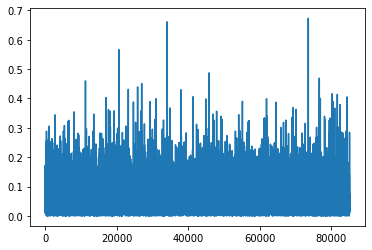

In [ ]:
plt.plot(distances.mean(axis =1))